In [49]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 


In [2]:
# import cleaned data

df = pd.read_csv('../data_processing/reviews_cleaned.csv')

In [3]:
df.head()

,profile_name,user_reviews,summary,text,stars
0,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5
1,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5
2,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5
4,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5


In [4]:
# let's warm up with little bit eda analysis

df.describe()

,stars
count,2730.000000
mean,4.294505
std,1.017476
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
# add id 

df['id'] = [i+1 for i in df.index]
df.head()

,profile_name,user_reviews,summary,text,stars,id
0,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,1
1,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,2
2,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,3
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,4
4,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,5


In [5]:
# change data type, 

df['user_reviews'] = df['user_reviews'].str.replace(',','').str.strip() # first I had to remove any comma for thousands
df['user_reviews'] = df['user_reviews'].apply(pd.to_numeric, errors = 'coerce').\
                                        astype('Int64') # change column type to numeric

In [6]:
df.dtypes

profile_name    object
user_reviews     Int64
summary         object
text            object
stars            int64
dtype: object

In [7]:
df.describe()

,user_reviews,stars
count,2730.0,2730.000000
mean,41.277289,4.294505
std,81.766457,1.017476
min,1.0,1.000000
25%,7.0,4.000000
50%,18.0,5.000000
75%,43.0,5.000000
max,1744.0,5.000000


<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Review Stars'>

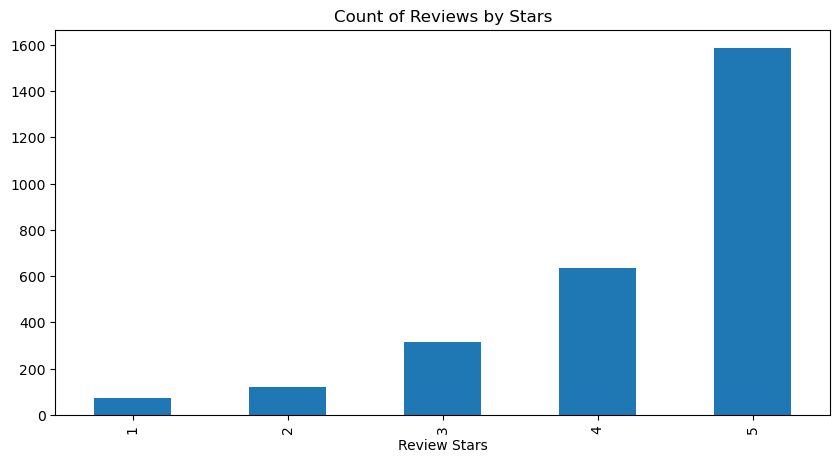

In [8]:
ax = df['stars'].value_counts().\
            sort_index().\
            plot(kind='bar',
                title='Count of Reviews by Stars',
                figsize=(10, 5))

ax.set_xlabel('Review Stars')
ax

In [11]:
text = df['text']
text.head()

0    We were recommended to go here while in Paphos...
1    Had some food and a few beers, as a band playe...
2    What a lovely evening, the staff couldn’t of b...
3    2nd night out of 4 for us. Had to go back as o...
4    Food really good,  fantastic service, and danc...
Name: text, dtype: object

In [61]:
ex = df['text'][24]
ex

'Visited this restaurant from a recommendation, cabaret entertainment kept the children entertained.  Food was not very good the night we visited, we were a family of 8 and 3 of the burgers  that was ordered was not good at all.  We had quite a long...More'

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()

In [18]:
#we store the sentiment in a dictionary
res={}

for i, r in tqdm(df.iterrows(), total = len(df)):
    text = r['text']
    myid = r['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2730 [00:00<?, ?it/s]

In [25]:
df

,profile_name,user_reviews,summary,text,stars,id
0,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5,1
1,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5,2
2,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5,3
3,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5,4
4,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5,5
...,...,...,...,...,...,...
2725,PartyGal,3,expensive and a rip off,On arrival at the restaurant we was greeted by...,3,2726
2726,LJWB,48,Family fun & huge portions!,"Eat here most times we visit Paphos, choice of...",4,2727
2727,LeedsBuffy,1,"Fantastic food, fantastic atmosphere, fantasti...",I e-mailed the restaurant prior to going on ho...,5,2728
2728,lynrevell,51,Good fun,Went to Fat Mamas for a meal on my last night ...,4,2729


In [42]:
# convert the dictionary into dataframe and merge it into the df

vaders_sentiment = pd.DataFrame(res).T 
vaders_sentiment.reset_index(inplace=True)
vaders_sentiment.rename(columns={'index': 'id'}, inplace=True)
vaders_sentiment = vaders_sentiment.merge(df, how='left')

In [45]:
vaders_sentiment.head()

,id,neg,neu,pos,compound,profile_name,user_reviews,summary,text,stars
0,1,0.055,0.724,0.222,0.8604,peterbH5107W,16,Excellent food and cabaret,We were recommended to go here while in Paphos...,5
1,2,0.000,0.611,0.389,0.9022,relinquishedall,8,"Music, Palinka, decent food","Had some food and a few beers, as a band playe...",5
2,3,0.000,0.660,0.340,0.9552,audreysouthampton,5,Great evening,"What a lovely evening, the staff couldn’t of b...",5
3,4,0.000,0.746,0.254,0.9762,pauladK1021PE,1,LOVE LOVE LOVE Fat Mamas,2nd night out of 4 for us. Had to go back as o...,5
4,5,0.000,0.684,0.316,0.9093,Le5ley63,30,Great night,"Food really good, fantastic service, and danc...",5


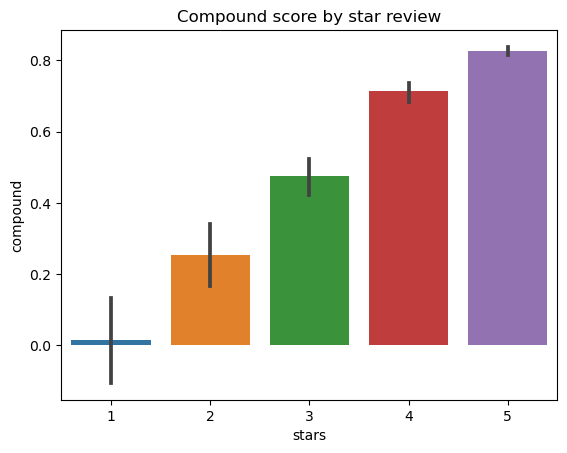

In [50]:
ax = sns.barplot(data=vaders_sentiment, x='stars', y='compound')
ax.set_title('Compound score by star review')
plt.show()

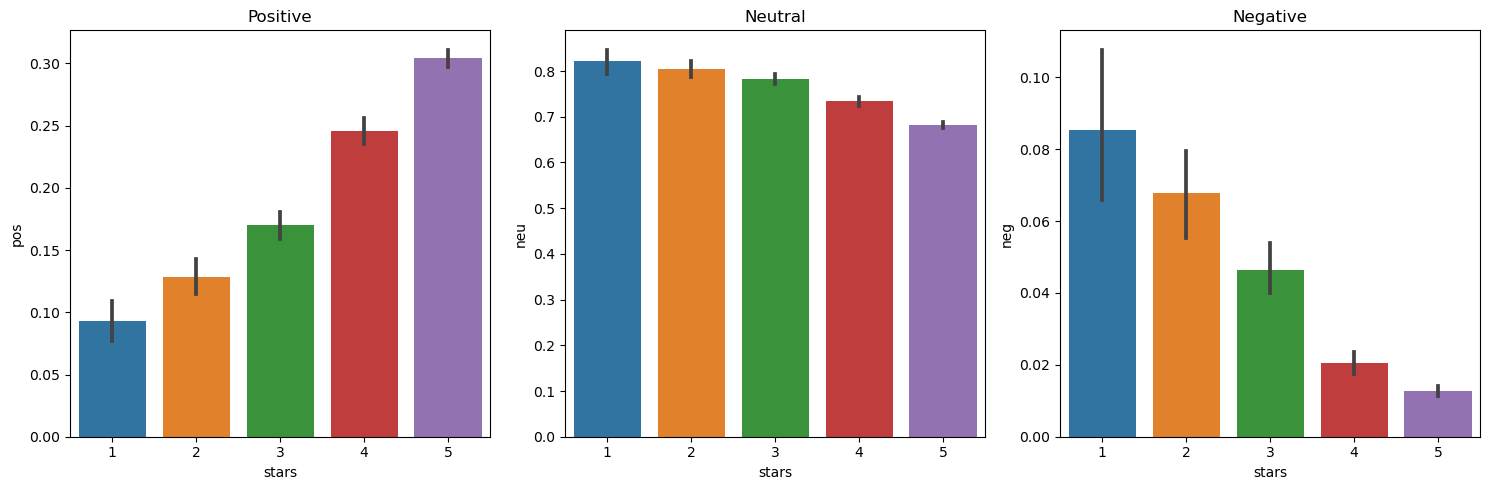

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = vaders_sentiment, x='stars', y='pos', ax = axs[0])
sns.barplot(data = vaders_sentiment, x='stars', y='neu', ax = axs[1])
sns.barplot(data = vaders_sentiment, x='stars', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [78]:
# let's see where the model does the opposite of what we think it should do

vaders_sentiment.query('stars == 1').sort_values('pos', ascending=False)['text'].values[0]

"It's almost the end of our 2 week holiday in Cyprus and we've eaten out almost every night and had amazing food every night. we'd heard a lot of good things about Fat Mamas The amazing show and fabulous food etc and how you will...More"

In [82]:
# What is the overall sentiment score for the restaurant based on the reviews?

vaders_sentiment['compound'].mean()

0.7113263736263737

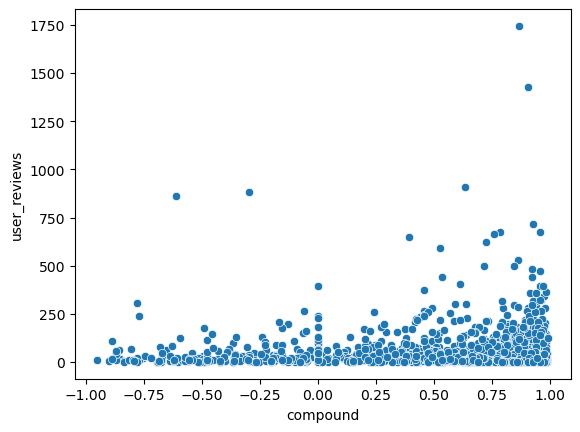

In [93]:
sns.scatterplot(data = vaders_sentiment, x='compound', y='user_reviews')
plt.show()

In [ ]:
#Is there a correlation between the length of the review and the sentiment score?
